## Group Members: Jiaqi Lin 

##  Implementation Task 1

Implement LSB, the images (orignal and secret) are of the same sizes. The code are modified based on the code from the given link: https://github.com/kelvins/steganography

In [44]:
import click
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import numpy as np
import plot

In [2]:
def int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return (f'{r:08b}', f'{g:08b}', f'{b:08b}')

In [3]:
def bin_to_int(rgb):
    """Convert a binary (string) tuple to an integer tuple.
    :param rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    :return: Return an int tuple (e.g. (220, 110, 96))
    """
    r, g, b = rgb
    return (int(r, 2),
            int(g, 2),
            int(b, 2))

In [4]:
def merge_rgb(rgb1, rgb2):
    """Merge two RGB tuples.
    :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    :param rgb2: Another string tuple
    (e.g. ("00101010", "11101011", "00010110"))
    :return: An integer tuple with the two RGB values merged.
    """
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rgb = (r1[:4] + r2[:4],
           g1[:4] + g2[:4],
           b1[:4] + b2[:4])
    return rgb

In [39]:
def merge(img1, img2):
    """Merge two images. The second one will be merged into the first one.
    
    :param img1: First image
    :param img2: Second image
    :return: A new merged image.
    """
    # Check the images dimensions
    if img2.shape[0] != img1.shape[0] or img2.shape[1] != img1.shape[1]:
        raise ValueError('Images should have the same shape')
    
    # Create a new image that will be outputted
    
    new_image = np.empty(shape=image.img_to_array(img1).shape)
    
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            rgb1 = int_to_bin(img1[i, j])
    
            rgb2 = int_to_bin(img2[i, j])
    
            # Merge the two pixels and convert it to a integer tuple
            rgb = merge_rgb(rgb1, rgb2)
    
            new_image[i, j] = bin_to_int(rgb)
    
    return new_image.astype('int')

In [31]:
def unmerge(img):
    """Unmerge an image.
    
    :param img: The input image.
    :return: The unmerged/extracted image.
    """
    # Create the new image
    new_image = np.empty(shape=image.img_to_array(img_i).shape)
    
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Get the RGB (as a string tuple) from the current pixel
            r, g, b = int_to_bin(img[i, j])
    
            # Extract the last 4 bits (corresponding to the hidden image)
            # Concatenate 4 zero bits because we are working with 8 bit
            rgb = (r[4:] + '0000',
                   g[4:] + '0000',
                   b[4:] + '0000')
    
            # Convert it to an integer tuple
            new_image[i, j] = bin_to_int(rgb)
    
    return new_image.astype('int')

## Dataset creation
The Testing dataset is from [here](http://r0k.us/graphics/kodak/).

In [33]:
test_dir = 'test'
img_names = os.listdir(test_dir)
img_shape = (256,256)

X_test = []
    
test_dir = os.path.join(test_dir)
test_imgs = os.listdir(test_dir)
for img_name_i in test_imgs:
    #img_i = Image.open(os.path.join(test_dir, img_name_i))
    img_i = image.load_img(os.path.join(test_dir, img_name_i), target_size=img_shape)
    x = image.img_to_array(img_i)
    X_test.append(x.astype('int'))

X_test = np.array(X_test)

In [34]:
test_S = X_test[0:X_test.shape[0] // 2]
test_C = X_test[X_test.shape[0] // 2:]

In [49]:
S_error = []
C_error = []
decode_C = []
decode_S = []
for i in range(0, test_S.shape[0]):
    print(i)
    new_img = merge(test_C[i], test_S[i])
    decode_img = unmerge(new_img)
    decode_C.append(new_img)
    decode_S.append(decode_img)
    S_error.append(np.sqrt(np.mean(np.square((decode_img/255 - test_S[i]/255)))))
    C_error.append(np.sqrt(np.mean(np.square((new_img/255 - test_C[i]/255)))))
    
    #break


0
1
2
3
4
5
6
7
8
9
10
11


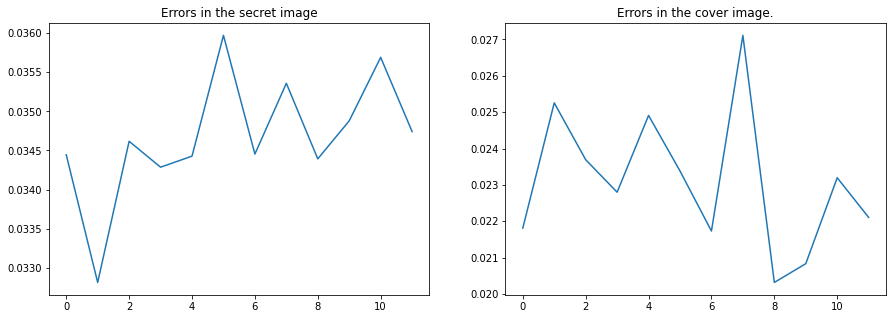

In [50]:
plot.plot_error(S_error, C_error)

Cover image: kodim13.png, Secret image: kodim01.png
Total loss: 0.06 
Loss on secret: 0.03 
Loss on cover: 0.02


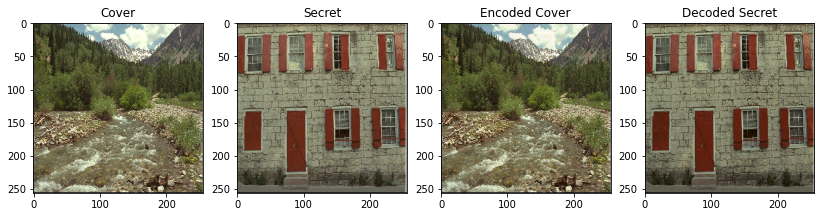

Cover image: kodim14.png, Secret image: kodim02.png
Total loss: 0.06 
Loss on secret: 0.03 
Loss on cover: 0.03


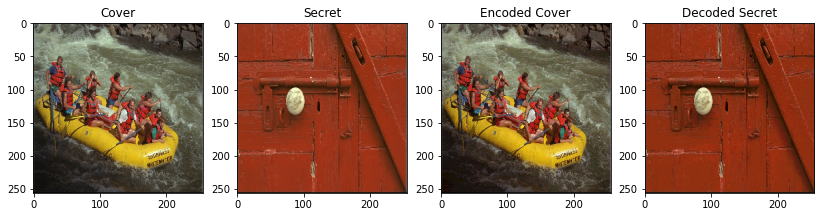

Cover image: kodim15.png, Secret image: kodim03.png
Total loss: 0.06 
Loss on secret: 0.03 
Loss on cover: 0.02


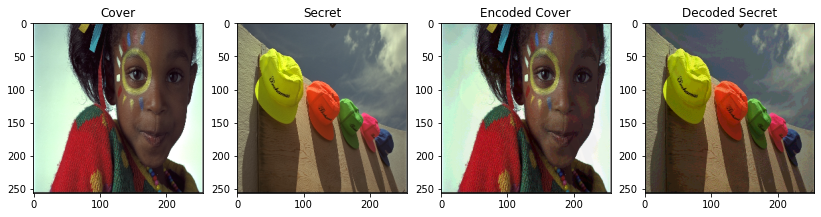

Cover image: kodim16.png, Secret image: kodim04.png
Total loss: 0.06 
Loss on secret: 0.03 
Loss on cover: 0.02


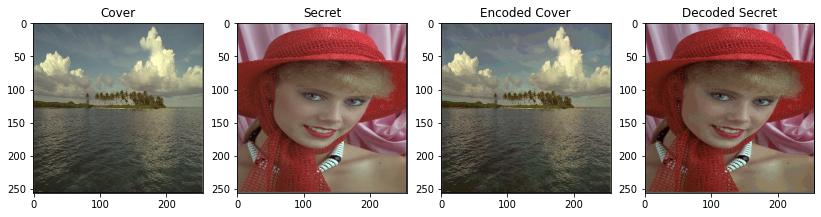

Cover image: kodim17.png, Secret image: kodim05.png
Total loss: 0.06 
Loss on secret: 0.03 
Loss on cover: 0.02


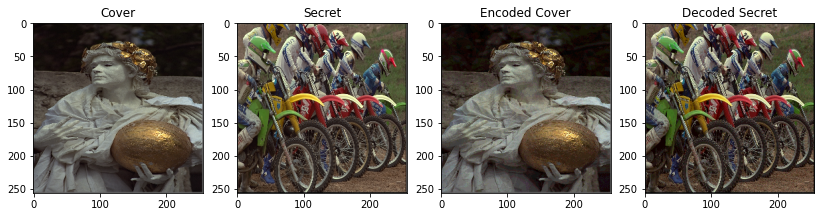

Cover image: kodim18.png, Secret image: kodim06.png
Total loss: 0.06 
Loss on secret: 0.04 
Loss on cover: 0.02


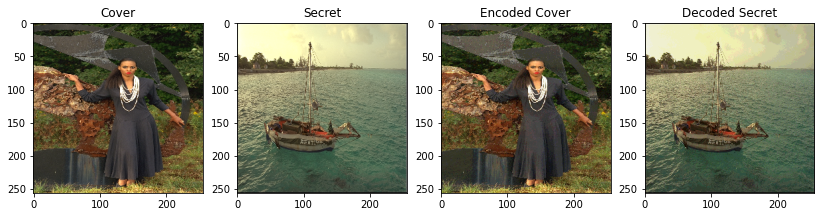

Cover image: kodim19.png, Secret image: kodim07.png
Total loss: 0.06 
Loss on secret: 0.03 
Loss on cover: 0.02


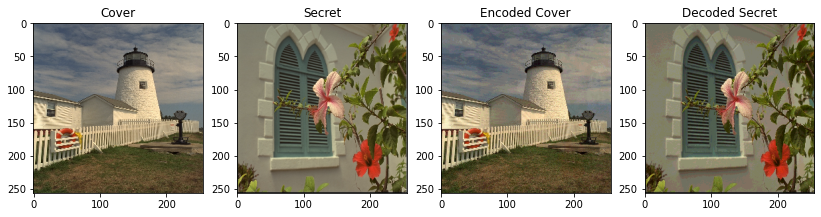

Cover image: kodim20.png, Secret image: kodim08.png
Total loss: 0.06 
Loss on secret: 0.04 
Loss on cover: 0.03


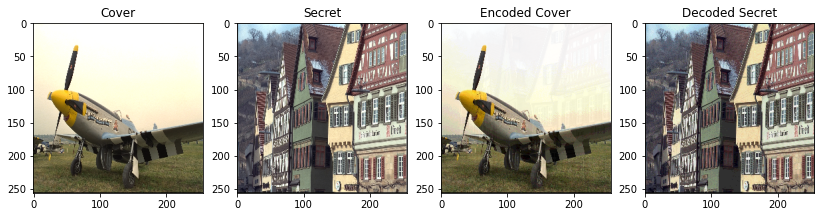

Cover image: kodim21.png, Secret image: kodim09.png
Total loss: 0.05 
Loss on secret: 0.03 
Loss on cover: 0.02


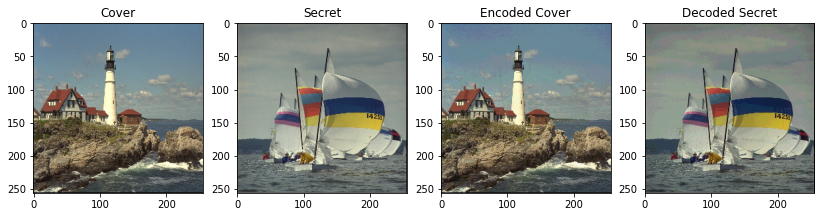

Cover image: kodim22.png, Secret image: kodim10.png
Total loss: 0.06 
Loss on secret: 0.03 
Loss on cover: 0.02


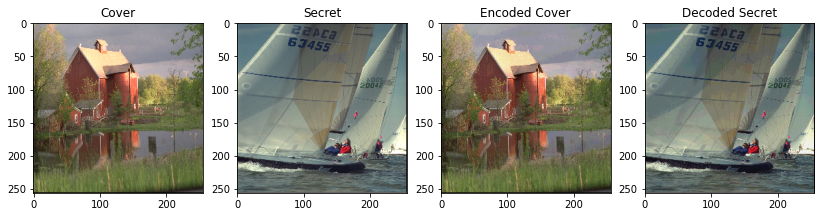

Cover image: kodim23.png, Secret image: kodim11.png
Total loss: 0.06 
Loss on secret: 0.04 
Loss on cover: 0.02


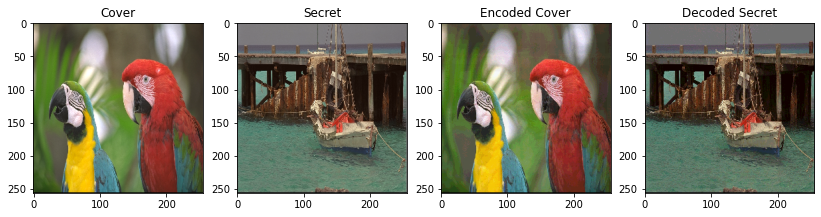

Cover image: kodim24.png, Secret image: kodim12.png
Total loss: 0.06 
Loss on secret: 0.03 
Loss on cover: 0.02


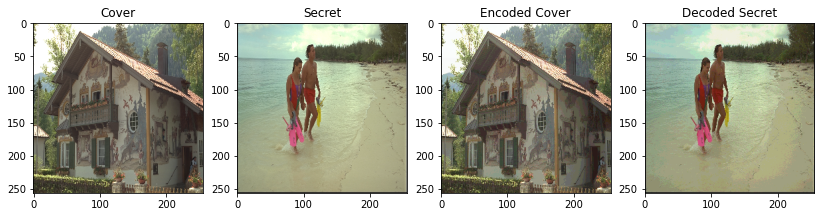

In [53]:
img_names = os.listdir(test_dir)
# Number of secret and cover pairs to show.
n = test_S.shape[0]
indx = [i for i in range(test_S.shape[0])]
# for i, idx in enumerate(range(0, n)):
for idx in indx:
    print('Cover image: '+img_names[idx+12]+', Secret image: '+img_names[idx])
    print('Total loss: {:.2f} \nLoss on secret: {:.2f} \nLoss on cover: {:.2f}'.format(S_error[idx]+C_error[idx], S_error[idx], C_error[idx]))    
    
    plt.figure(figsize=(14, 15))
    
    plot.show_image(test_C[idx], 1, 4, 1, 'Cover')

    plot.show_image(test_S[idx], 1, 4, 2, 'Secret')
    
    plot.show_image(decode_C[idx], 1, 4,  3, 'Encoded Cover')
    
    plot.show_image(decode_S[idx], 1, 4, 4, 'Decoded Secret')
    plt.show()